In [1]:
# Here first we will import all our necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Now we will import our dataset using pandas
car_data = pd.read_csv("car_price_prediction_data.txt")

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#These are all the unique columns in our dataset
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
# As we can see here there are no null blocks in our data
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
car_data.shape

(301, 9)

In [7]:
# First we will drop our unecessary columns
car_data = car_data.drop(["Car_Name"], axis=1)

In [8]:
car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
#Here is all the info about our dataset and datatypes
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [10]:
##Here it describes our data in the columns
car_data.describe

<bound method NDFrame.describe of      Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0    2014           3.35           5.59       27000    Petrol      Dealer   
1    2013           4.75           9.54       43000    Diesel      Dealer   
2    2017           7.25           9.85        6900    Petrol      Dealer   
3    2011           2.85           4.15        5200    Petrol      Dealer   
4    2014           4.60           6.87       42450    Diesel      Dealer   
..    ...            ...            ...         ...       ...         ...   
296  2016           9.50          11.60       33988    Diesel      Dealer   
297  2015           4.00           5.90       60000    Petrol      Dealer   
298  2009           3.35          11.00       87934    Petrol      Dealer   
299  2017          11.50          12.50        9000    Diesel      Dealer   
300  2016           5.30           5.90        5464    Petrol      Dealer   

    Transmission  Owner  
0         Manua

In [11]:
car_data.Year.unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [12]:
##These are all the statistical information we need for observation
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
car_data.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [14]:
car_data.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [15]:
car_data.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [16]:
car_data.Year.value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [17]:
## our model just takes integers so we have to encode it accordingly

#Fuel_Type: Petrol = 0, Diesel = 1 , CNG = 2
#Seller_Type: Manual = 0 , Automatic = 1 
#Seller_Type: Dealer = 0 , Individual = 1

car_data.Fuel_Type.replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True)
car_data.Transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)
car_data.Seller_Type.replace(regex={"Dealer":"0","Individual":"1"},inplace=True)

<AxesSubplot:xlabel='Owner', ylabel='count'>

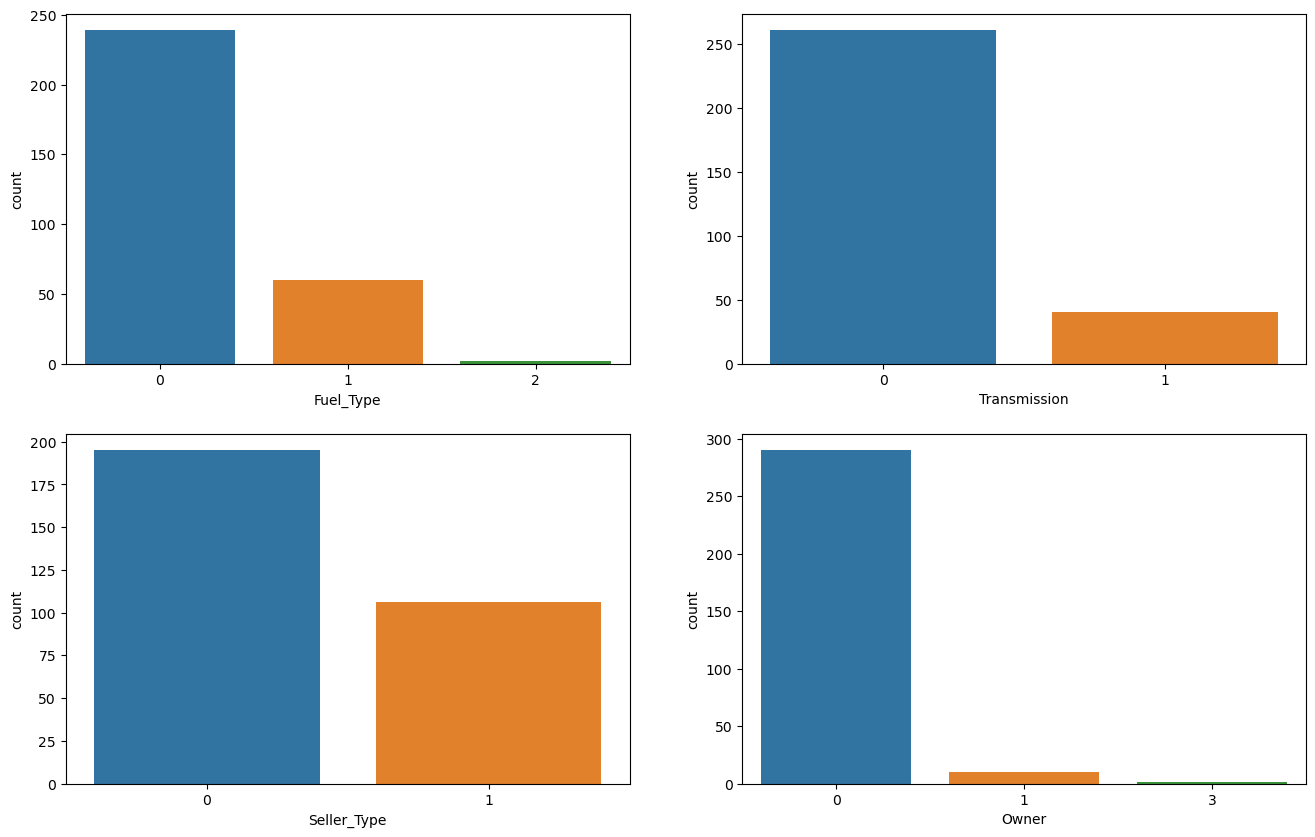

In [18]:
## we can form a countplot to observe the number of different types in our dataset
fig,ax = plt.subplots(2,2,figsize=(16,10))
sns.countplot(x='Fuel_Type', data=car_data, ax=ax[0][0])
sns.countplot(x='Transmission', data=car_data, ax=ax[0][1])
sns.countplot(x='Seller_Type', data=car_data, ax=ax[1][0])
sns.countplot(x='Owner', data=car_data, ax=ax[1][1])

In [19]:
#Here we see what is the correlation of different columns in our dataset
car_data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


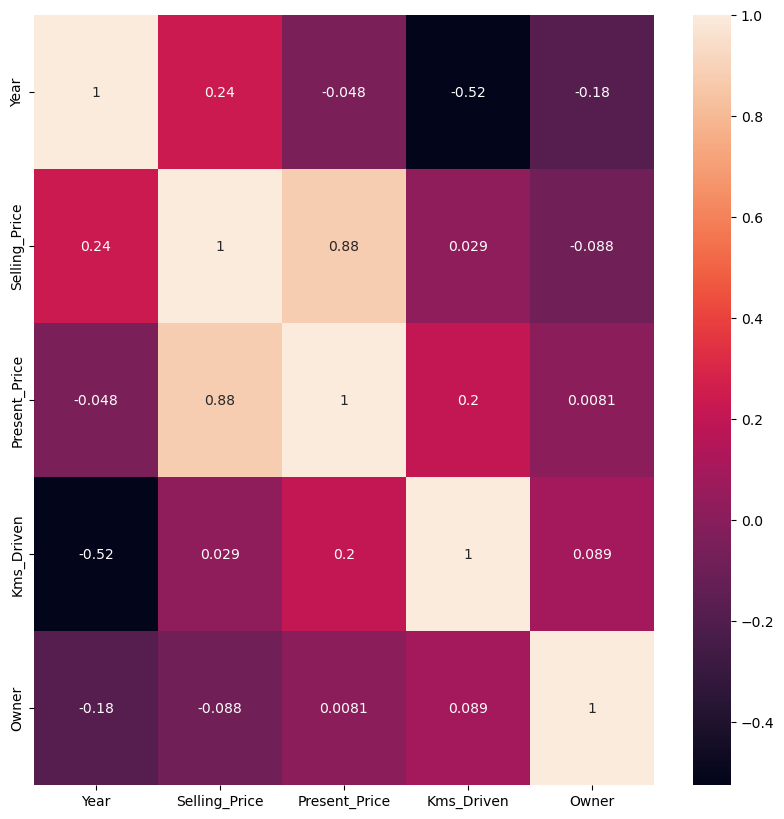

In [20]:
#This is a visual representation of our correlation
plt.figure(figsize = (10,10))
correlation_matrix = car_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [21]:
#Now we will divide our dataset in different datasets to form our target dataset
X = car_data.drop("Selling_Price", axis=1)
y = car_data.Selling_Price

In [22]:
X.shape

(301, 7)

In [23]:
y.shape

(301,)

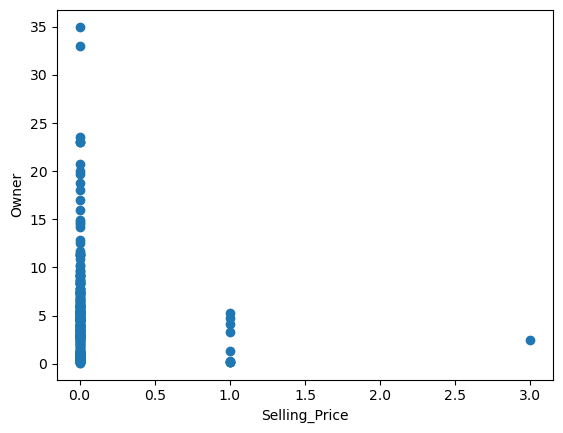

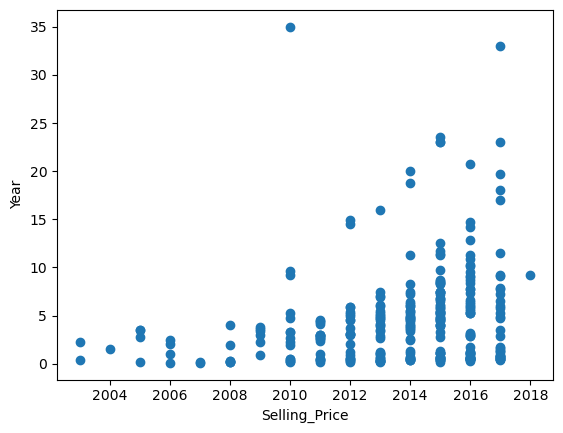

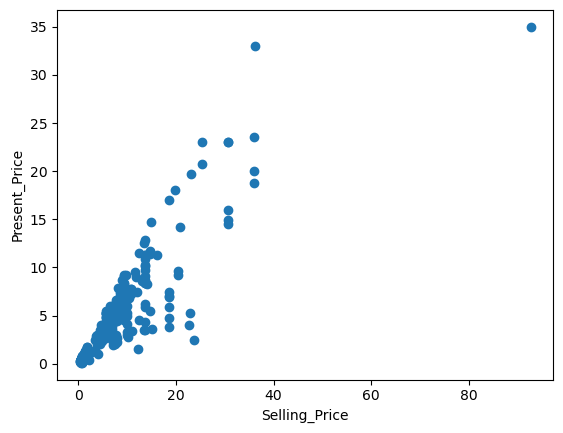

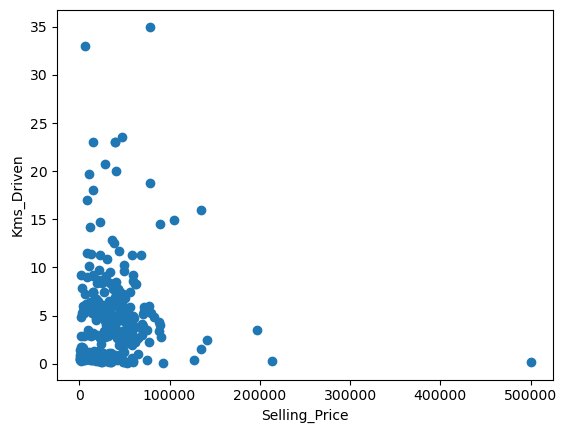

<Figure size 640x480 with 0 Axes>

In [24]:
#Here it shows different scatter plots with respect to our target dataset
plt.scatter(X.Owner, y)
plt.xlabel('Selling_Price')
plt.ylabel('Owner')
fig1 = plt.figure()
plt.scatter(X.Year, y)
plt.xlabel('Selling_Price')
plt.ylabel('Year')
fig2 = plt.figure()
plt.scatter(X.Present_Price, y)
plt.xlabel('Selling_Price')
plt.ylabel('Present_Price')
fig3 = plt.figure()
plt.scatter(X.Kms_Driven, y)
plt.xlabel('Selling_Price')
plt.ylabel('Kms_Driven')
fig4 = plt.figure()
plt.show()

In [25]:
#Now split the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [26]:
#Now for more accurate and logical model formation we will import cross validation
from sklearn.model_selection import cross_val_score

In [27]:
##Now we will write a function to apply our algorithm and also our cross validation
cv = 5
CV = [] 

def model(algorithm,x_train,y_target,x_test,y_target_test): 
    algorithm.fit(x_train,y_target)
    predicts=algorithm.predict(x_test)
    prediction=pd.DataFrame(predicts)
    cross_val=cross_val_score(algorithm,x_train,y_target,cv=cv)
    
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    
     # Plot for prediction vs originals
    test_index=y_target_test.reset_index()["Selling_Price"]
    ax=test_index.plot(label="Original",figsize=(15,8),linewidth=2,color="r")
    ax=prediction[0].plot(label = "Prediction",figsize=(15,8),linewidth=2,color="b")
    plt.legend()
    plt.title("Original VS Prediction")
    plt.xlabel("Index")
    plt.ylabel("Values")
    plt.show()

In [28]:
#Now we will use linear regression so we will import it from sklearn
from sklearn.linear_model import LinearRegression

CV scores: [0.89746723 0.88756505 0.83007487 0.81438137 0.75880539] 

CV scores mean: 0.8376587811920085


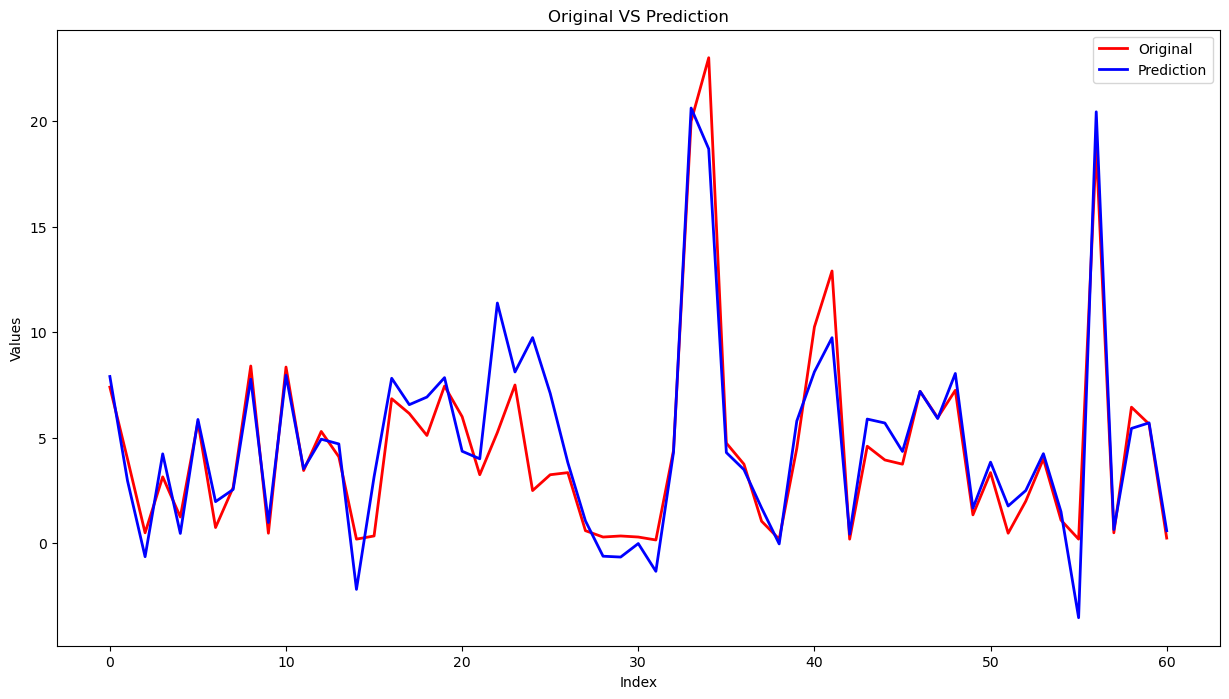

In [29]:
#Here along with our results we will also form a graph which shows our difference between originals and predicitons
lr = LinearRegression()
model(lr,X_train,y_train,X_test,y_test)